# Uso de MLP para regresión

### Importaciones

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

### Carga del dataset

Montar Google Drive

In [ ]:
# Versión para Google Colab
from google.colab import drive  # montar Google Drive
drive.mount('/content/gdrive')
DIRECTORIO = '/content/gdrive/MyDrive/Colab Notebooks/CursoDL/datasets/' #  directorio de trabajo

# Versión para Windows
# DIRECTORIO = 'c:/temp/'

Mounted at /content/gdrive


In [ ]:
dataset = np.loadtxt(DIRECTORIO + 'hourly_wages_data.csv', delimiter=',', skiprows=1)

n_cols_total = dataset.shape[1];      # número de columnas del dataset
n_cols = n_cols_total - 1             # columnas entrenamiento
train_y = dataset[:, 0]               # el objetivo está en la 1ª columna
train_X = dataset[:, 1:n_cols_total]  # los datos de entrada son el resto de las columnas
print ('Dimensiones del dataset:', dataset.shape)

Dimensiones del dataset: (534, 10)


### Creación del modelo


In [ ]:
modelo = Sequential() # crea modelo

modelo.add(Dense(200, activation='relu', input_shape=(n_cols,)))
modelo.add(Dense(200, activation='relu'))
modelo.add(Dense(200, activation='relu'))
modelo.add(Dense(1))

# red más pequeña para comparar
# model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
# model.add(Dense(10, activation='relu'))
# model.add(Dense(1))

### Compilación

In [ ]:
#compilar con MSE (mean squared error) como medida de calidad
modelo.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

### Entrenamiento:

In [ ]:
historial=modelo.fit(train_X, train_y, validation_split=0.2, epochs=100, batch_size=128)

Epoch 1/100
4/4 [==============================] - 3s 55ms/step - loss: 38.6147 - mse: 38.6147 - val_loss: 40.3809 - val_mse: 40.3809
Epoch 2/100
4/4 [==============================] - 0s 10ms/step - loss: 23.4343 - mse: 23.4343 - val_loss: 43.2899 - val_mse: 43.2899
Epoch 3/100
4/4 [==============================] - 0s 10ms/step - loss: 17.8705 - mse: 17.8705 - val_loss: 27.8283 - val_mse: 27.8283
Epoch 4/100
4/4 [==============================] - 0s 11ms/step - loss: 20.5797 - mse: 20.5797 - val_loss: 36.2020 - val_mse: 36.2020
Epoch 5/100
4/4 [==============================] - 0s 10ms/step - loss: 22.8058 - mse: 22.8058 - val_loss: 30.8578 - val_mse: 30.8578
Epoch 6/100
4/4 [==============================] - 0s 10ms/step - loss: 21.4898 - mse: 21.4898 - val_loss: 29.0676 - val_mse: 29.0676
Epoch 7/100
4/4 [==============================] - 0s 10ms/step - loss: 21.1082 - mse: 21.1082 - val_loss: 33.4878 - val_mse: 33.4878
Epoch 8/100
4/4 [==============================] - 0s 10ms/ste

### Visualización de la historia

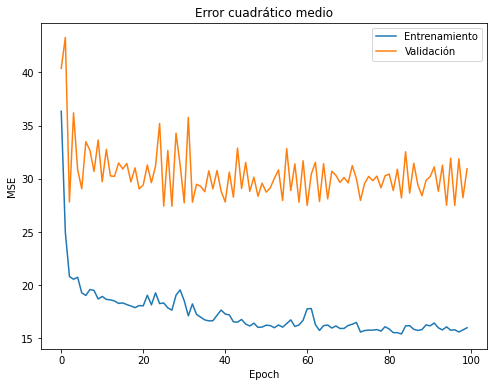

In [ ]:
plt.rcParams['figure.figsize'] = (8, 6)  # tamaño por defecto para todas las gráficas
plt.plot(historial.history['mse'])
plt.plot(historial.history['val_mse'])
plt.title('Error cuadrático medio')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Entrenamiento', 'Validación'], loc='upper right');